In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
#data validation and data visualization
df.groupby('left').mean()

C:\Users\fadib\AppData\Local\Temp\ipykernel_6792\616191078.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [4]:
'''From above table we can draw following conclusions,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs 
the retained ones (0.66)
**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm'''

#we have not considered salay and department as it is not numeric

'From above table we can draw following conclusions,\n\n**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs \nthe retained ones (0.66)\n**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)\n**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm'

<Axes: xlabel='salary', ylabel='count'>

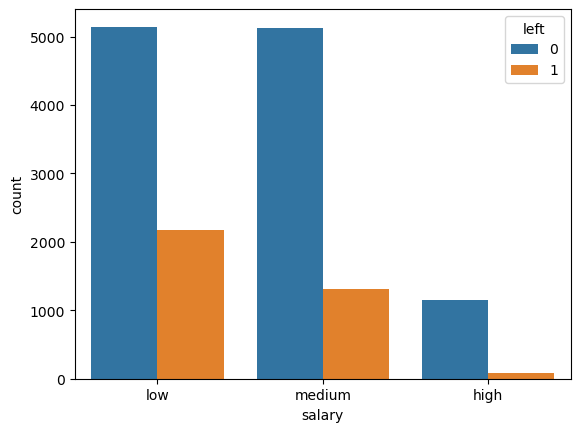

In [5]:
sns.countplot(x='salary', data=df, hue='left')

#chart shows high salary people do not leave company

<Axes: xlabel='Department', ylabel='count'>

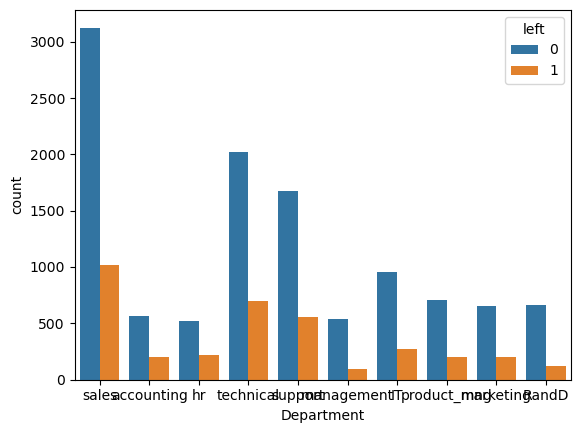

In [6]:
sns.countplot(x='Department', data=df, hue='left')
# chart shows there seem to be some impact of department on employee retention but it is not major hence we will ignore departm

In [7]:
'''From the data analysis so far we can conclude that we will use following variables as independant variables in our model
**Satisfaction Level**
**Average Monthly Hours**
**Promotion Last 5 Years**
**Salary**'''

'From the data analysis so far we can conclude that we will use following variables as independant variables in our model\n**Satisfaction Level**\n**Average Monthly Hours**\n**Promotion Last 5 Years**\n**Salary**'

In [8]:
subdf=df[['satisfaction_level','promotion_last_5years','average_montly_hours','salary']]
subdf.head()

,satisfaction_level,promotion_last_5years,average_montly_hours,salary
0,0.38,0,157,low
1,0.80,0,262,medium
2,0.11,0,272,medium
3,0.72,0,223,low
4,0.37,0,159,low


In [9]:
x=pd.get_dummies(df.salary)
x

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [10]:
x=pd.get_dummies(df.salary, prefix='salary')
x

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [11]:
fin=pd.concat([subdf,x], axis='columns')
fin.head()

,satisfaction_level,promotion_last_5years,average_montly_hours,salary,salary_high,salary_low,salary_medium
0,0.38,0,157,low,0,1,0
1,0.80,0,262,medium,0,0,1
2,0.11,0,272,medium,0,0,1
3,0.72,0,223,low,0,1,0
4,0.37,0,159,low,0,1,0


In [12]:
fin.drop('salary', axis='columns', inplace=True)
fin.head()

,satisfaction_level,promotion_last_5years,average_montly_hours,salary_high,salary_low,salary_medium
0,0.38,0,157,0,1,0
1,0.80,0,262,0,0,1
2,0.11,0,272,0,0,1
3,0.72,0,223,0,1,0
4,0.37,0,159,0,1,0


In [13]:
X=fin
y= df.left
from sklearn.model_selection import train_test_split as tst
X_train,X_test,y_train,y_test= tst(X,y, test_size=0.1, random_state=10)

In [14]:
from sklearn.linear_model import LogisticRegression
mod=LogisticRegression()
mod.fit(X_train,y_train)

LogisticRegression()

In [15]:
mod.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
mod.score(X_test,y_test)

0.778